<a href="https://colab.research.google.com/github/pedro-hnrq/House-Price/blob/third_model/Executando_o_modelo_apos_a_limpeza_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices Advanced Regression Techniques


---


(Preços de Casas )

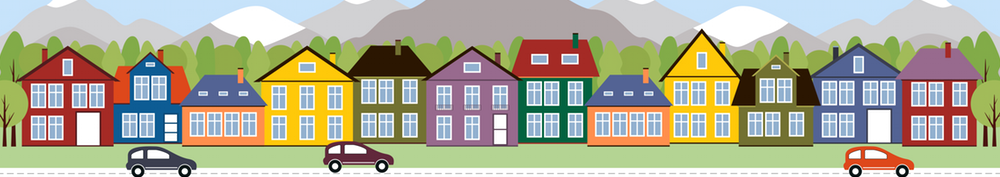

Disponível: [Preços de Casas](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)






## **1° Parte** - Primeiro modelo

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/Resultados/train_2.csv")
test = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/Resultados/test_2.csv")

In [ ]:
display(train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,-1,Reg,Lvl,AllPub,...,0,-1,MnPrv,-1,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,-1,Reg,Lvl,AllPub,...,0,-1,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,4,2010,WD,Normal,142125


In [ ]:
train.shape

(1460, 81)

In [ ]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [ ]:
# Informações
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Selecionando apenas as colunas numéricas
cols_nr = train.columns[train.dtypes != 'object']
cols_nr[cols_nr != 'SalePrice']

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
# E criar uma nova base com esses valores
train = train.loc[:,cols_nr]
train.shape

(1460, 38)

In [ ]:
# Mantendo também apenas as colunas numéricas para a base de teste (que não possui SalePrice)
test = test.loc[:,cols_nr[cols_nr != 'SalePrice']]
test.shape

(1459, 37)

In [ ]:
# Eliminar as colunas com mais de 10% de valores vazios
elimenate = train.columns[train.isnull().sum()/train.shape[0] > 0.1]
elimenate

Index([], dtype='object')

### Criando o modelo



*  Separar em treino e teste
  *   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [ ]:
X = train.drop('SalePrice', axis=1)
y = train.SalePrice

In [ ]:
# Importanto o train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

### Algoritmos



*   [Regressão Linear](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
*   [Árvore de Regressão](https://scikit-learn.org/stable/modules/tree.html#regression)
*   [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn-neighbors-kneighborsregressor)



In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [ ]:
# Fazendo a previssão pros dados de teste
y_pred_rl = reg_rl.predict(X_test)


In [ ]:
from sklearn import tree

In [ ]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_ad = tree.DecisionTreeRegressor().fit(X_train, y_train)


In [ ]:
# Fazendo a previsão
y_pred_ad = reg_ad.predict(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [ ]:
# Fazendo a previsão
y_pred_knn = reg_knn.predict(X_test)

### Tanta o erro absoluto quanto o quadrático:



*   [Erro médio absoluto](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)
*   [Erro quadrático médio](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)



In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Avaliando o erro da regressão
print(mean_absolute_error(y_test, y_pred_rl))
print(mean_squared_error(y_test, y_pred_rl))

23908.41241228935
1546018499.3696399


In [ ]:
# da árvore de decisão
print(mean_absolute_error(y_test, y_pred_ad))
print(mean_squared_error(y_test, y_pred_ad))

27618.695020746887
2455987436.251037


In [ ]:
# e do knn
print(mean_absolute_error(y_test, y_pred_knn))
print(mean_squared_error(y_test, y_pred_knn))

33247.14937759336
2732965076.467842


### Visualização y_test as previsões feitas



[Matplotlib](https://matplotlib.org)



In [ ]:
import matplotlib.pyplot as plt

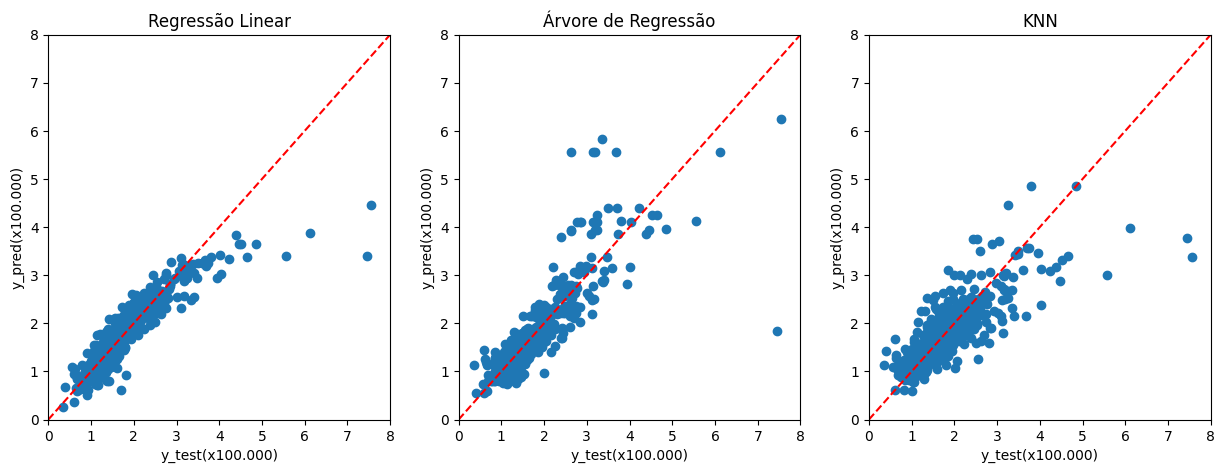

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_rl/100000)
ax[0].plot([0, 8], [0, 8], '--r')
ax[1].scatter(y_test/100000, y_pred_ad/100000)
ax[1].plot([0, 8], [0, 8], '--r')
ax[2].scatter(y_test/100000, y_pred_knn/100000)
ax[2].plot([0, 8], [0, 8], '--r')

# ax[0].set(xlim=(0, 800000), ylim=(0, 800000))

ax[0].set(xlim=(0, 8), ylim=(0, 8))
ax[0].set_xlabel('y_test(x100.000)')
ax[0].set_ylabel('y_pred(x100.000)')
ax[0].set_title('Regressão Linear')

ax[1].set(xlim=(0, 8), ylim=(0, 8))
ax[1].set_xlabel('y_test(x100.000)')
ax[1].set_ylabel('y_pred(x100.000)')
ax[1].set_title('Árvore de Regressão')

ax[2].set(xlim=(0, 8), ylim=(0, 8))
ax[2].set_xlabel('y_test(x100.000)')
ax[2].set_ylabel('y_pred(x100.000)')
ax[2].set_title('KNN')

plt.show()



*   **Utilizar a Regressão Linear por ter sido o algoritmo com menor erro quadrático médio, a mesma métrica avaliada pelo Kaggle na hora de classificar os modelos**



### Fazendo a previsão para a **base de teste**



*   **Obs.:** não excluir linhas



In [ ]:
test.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [ ]:
# Vamos usar a Regressão Linear para fazer a previsão
y_pred = reg_rl.predict(test)

In [ ]:
# Podemos adicionar essa coluna de previsão na nossa base
test['SalePrice'] = y_pred

In [ ]:
# E extrair somente o Id e o SalePrice
base_kaggle = test[['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,121257.501624
1,1462,133303.929920
2,1463,169238.649242


In [ ]:
base_kaggle.to_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/Resultados/resultado2.csv", index=False)